# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [41]:
import pandas as pd

tabela = pd.read_csv("Aula 3 - Advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [42]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

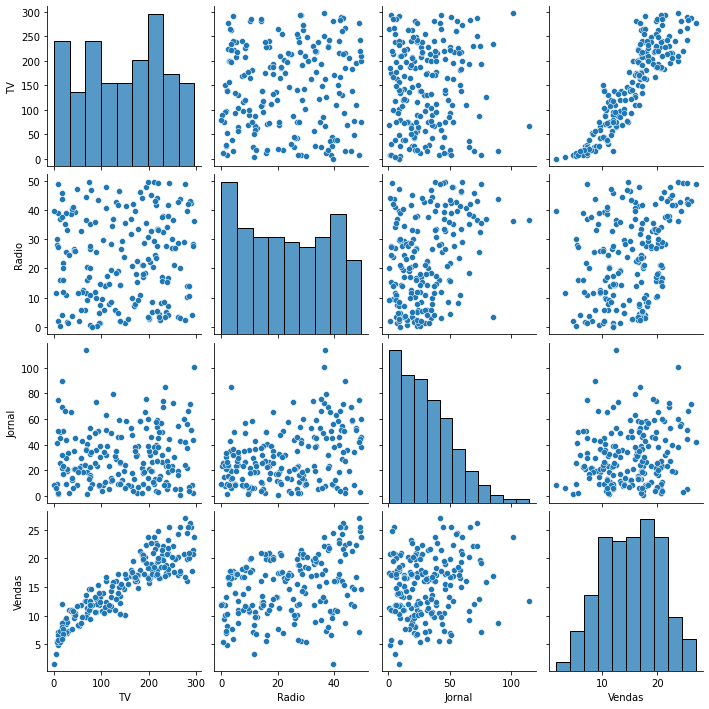

<AxesSubplot:>

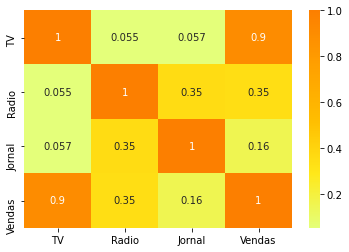

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
#cor de correlacao
#cmap: a paleta de cores
#annot: anotaçoes

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [50]:
from sklearn.model_selection import train_test_split

#para comparar todas as colunas com os valores de vendas
x = tabela.drop("Vendas", axis=1)
y = tabela["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [51]:
# é um ex de regressao (se o que eu quiser descobrir for um numero) ou de classificaçao (se for categoria)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria a inteligencia artificial
linear = LinearRegression()
randomforest = RandomForestRegressor()

# treina a inteligencia artificial
linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [52]:
from sklearn import metrics

#qto + proximo de 100% melhor o modelo

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

#r2 = r ao quadrado
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(r2_linear, r2_random)

#erro quadratico medio
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)
print(erro_linear, erro_random)

#obs; existem outras métricas, mas as mais utilizadas sao essas. pesquisar outras 


0.874426868325641 0.9372066071425547
3.0900042121800504 1.5451701000000024


#### Visualização Gráfica das Previsões

,Vendas Reais,Previsão Random
0,17.0,17.584
1,10.4,11.670
2,16.9,17.298
3,27.0,25.398
4,19.2,20.846
5,14.0,12.837
6,12.5,13.450
7,19.8,19.231
8,16.1,20.063
9,11.9,12.437


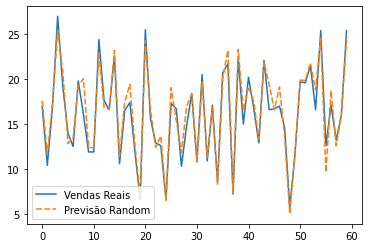

In [53]:
tabela_comparacao = pd.DataFrame()
# criar coluna Vendas Reais
tabela_comparacao["Vendas Reais"] = y_teste

tabela_comparacao["Previsão Random"] = teste_random

# após estes dois comandos somados ao Display(tabela_comparacao), aparecerá uma  tabela com índice totalmente desorganizado e fora
# de ordem. Para organizá-lo, se faz:
tabela_comparacao = tabela_comparacao.reset_index(drop=True)
# o método reset_index reorganiza o índice e o drop apaga o índice anterior

display(tabela_comparacao)
sns.lineplot(data=tabela_comparacao)
plt.show()

#caso entrem novos valores para comparar, inserir da seguinte forma, substituindo o que está nos parenteses pelo valor numérico
# correspondente ao valor do investimento feito em cada tipo:
# randomforest.predict(valorTv, valorJornal, valorVendas)
# ele retornara com a previsao de vendas de cada categoria

#### Qual a importância de cada variável para as vendas?

In [54]:
print(randomforest.feature_importances_)
print("TV", "Radio", "Jornal")
# revela a ordem de importancia de cada canal de vendas, conforme o inserido. sendo TV, Radio, Jornal
# quanto maior, mais importante

[0.87868281 0.10883435 0.01248284]
TV Radio Jornal


#### Será que estamos investindo certo?

In [55]:
print(tabela[["TV", "Radio", "Jornal"]].sum())
# comparando com o código acima de Importancia, podemos ver que apesar do RADIO ser mais importante que o JORNAL,
# o investimento no JORNAL é muito superior ao RADIO

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64
